## Gaussian Prediction with PCA

### Step 1- Load semua sumur

In [50]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import lasio
import seaborn as sns


"""
depth in ft
DT in mus/ft
rhob in g/cc
Vp in m/s
P Impedance in m/s g/cc
"""

"""
load sumur 1
"""
las = lasio.read(r'puk1.las')

df=las.df()
gr_max=df['GR'].max()
gr_min=df['GR'].min()
df['VSH']=(df['GR']-gr_min)/(gr_max-gr_min)
df['Vp']=1/df['DT']*10**(6)
df['P_imp']=df['Vp']*df['RHOB']

#rename column
df=df.rename(columns={'NPHI_LS':'NPHI'})

#drop column which have no record
df_drop=df.dropna(subset=['P_imp'],axis=0)

#select only at the target area
df_target=df_drop.loc[3337.79:3751.5].reset_index()

"""
load sumur 2
"""
las2 = lasio.read(r'pum1.las')

df2=las2.df()
gr_max=df2['GR'].max()
gr_min=df2['GR'].min()
df2['VSH']=(df2['GR']-gr_min)/(gr_max-gr_min)
df2['Vp']=1/df2['DT']*10**(6)
df2['P_imp']=df2['Vp']*df2['RHOB']

#rename column
df2=df2.rename(columns={'NPHI_LS':'NPHI'})

#drop column which have no record
df2_drop=df2.dropna(subset=['P_imp'],axis=0)

#select only at the target area
df2_target=df2_drop.loc[3327.15:3701.74].reset_index()

#Load sumur 3

las3 = lasio.read(r'pux2.las')


df3=las3.df()
gr_max=df3['GR'].max()
gr_min=df3['GR'].min()
df3['VSH']=(df3['GR']-gr_min)/(gr_max-gr_min)
df3['Vp']=1/df3['DT']*10**(6)
df3['P_imp']=df3['Vp']*df3['RHOB']

#rename column
df3=df3.rename(columns={'NPHI_LS':'NPHI'})

#drop column which have no record
df3_drop=df3.dropna(subset=['P_imp'],axis=0)

#select only at the target area
#df3_target=df3_drop.loc[3316.28:3651.67].reset_index() #uxa-1
df3_target=df3_drop.loc[3299.43:3683.01].reset_index() #ux-2

#Load sumur 4

las4 = lasio.read(r'put1.las')


df4=las4.df()
gr_max=df4['GR'].max()
gr_min=df4['GR'].min()
df4['VSH']=(df4['GR']-gr_min)/(gr_max-gr_min)
df4['Vp']=1/df4['DT']*10**(6)
df4['P_imp']=df4['Vp']*df3['RHOB']

#rename column
df4=df4.rename(columns={'NPHI_LS':'NPHI'})

#drop column which have no record
df4_drop=df4.dropna(subset=['P_imp'],axis=0)

#select only at the target area
#df4_target=df4_drop.loc[3316.28:3651.67].reset_index() #uxa-1
df4_target=df4_drop.loc[3366.81:3779.5].reset_index() #ux-2

### Step 2 - Heat map correlation matrix

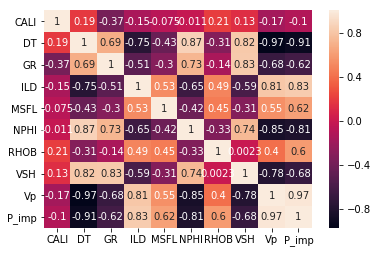

In [39]:
#combine sumur 1 dan 2
df_com=pd.concat([df_target,df2_target]).reset_index(drop=True)
df_com.set_index('DEPTH',inplace=True)
#df_com.drop(columns=['GR','DT'],inplace=True)

corrmap=df_com.corr()
sns.heatmap(corrmap,annot=True)
plt.show()

### Step 3 - Standardize data
Data X dan Y di-split lalu distandardize

In [40]:
# split X and y

X=df_com[['ILD','VSH','Vp','P_imp']]
y=df_com[['NPHI']]


#test and train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2,random_state=0)


#standardizing data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)


### Step 4 - PCA
Pertama-tama kita cek dulu variance ratio semua komponen (untuk data ini pakai 4 komponen). Dari hasilnya kita bisa lihat kontribusi masing-masing komponen.

In [41]:
from sklearn.decomposition import PCA

pca_comp= PCA(n_components=4)
xtrainPCA= pca_comp.fit_transform(X_train_std)


print(pca_comp.components_)
print (pca_comp.explained_variance_ratio_)

xtestPCA = pca_comp.fit_transform(X_test_std)
print(pca_comp.components_)
print (pca_comp.explained_variance_ratio_)

[[ 0.48288051 -0.45396446  0.53410395  0.52485774]
 [ 0.54311835  0.81013788 -0.01854102  0.2198984 ]
 [ 0.68509404 -0.33403642 -0.41542588 -0.49647475]
 [-0.04995039 -0.16128407 -0.73607781  0.65550124]]
[0.84141957 0.1086924  0.04630285 0.00358517]
[[ 0.44868473 -0.43026769  0.55123105  0.55650342]
 [ 0.31615763  0.88021104  0.08214584  0.3442745 ]
 [ 0.83587332 -0.10329878 -0.33287188 -0.4240772 ]
 [ 0.00649275  0.17154473  0.76065281 -0.62604916]]
[0.82653314 0.11192951 0.05848746 0.00304989]


### Step 4 - PCA
Sesuai arahan shifu stipen, kita pakai 90% sebagai cut-offnya. Berdasarkan data ini, hanya 2 komponen awal saja yang akan dipakai.

In [42]:
pca90 = PCA(.9)
xtrainPCA = pca90.fit_transform(X_train_std)

print(pca90.components_)
print (pca90.explained_variance_ratio_)

xtestPCA = pca90.fit_transform(X_test_std)

[[ 0.48288051 -0.45396446  0.53410395  0.52485774]
 [ 0.54311835  0.81013788 -0.01854102  0.2198984 ]]
[0.84141957 0.1086924 ]


### Step 5 - Modelling GPR
Ini gak gw ganti sama sekali parameter yang dipakai dekha kemarin. Hanya xtrain dan xtest nya gw pake yg uda di-PCA

In [43]:
import sklearn.gaussian_process as gp

kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model.fit(xtrainPCA, y_train)
params = model.kernel_.get_params()

y_pred, std = model.predict(xtestPCA, return_std=True)

#model performance
from sklearn.metrics import mean_squared_error,r2_score

test_r2_score=r2_score(y_test, y_pred)
print(test_r2_score)

0.7114218989631407


### Step 6 - PDF dan CDF


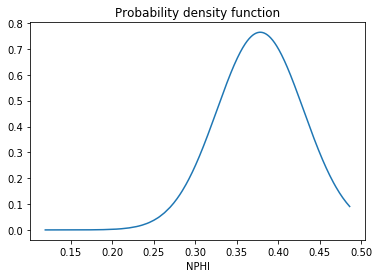

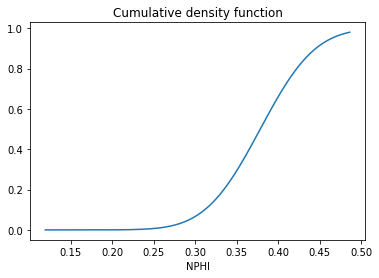

In [44]:
#creating pdf function from porosity
from scipy.stats import norm
import numpy as np
from statistics import stdev
from sklearn import preprocessing


y_sort=y.sort_values(by='NPHI')
y_sort=y_sort['NPHI']
y_mean=y_sort.mean()
y_std=stdev(y_sort)

y2=norm.pdf(y_sort,y_mean,y_std)
y2=y2/10

z=norm.cdf(y_sort,y_mean,y_std)
z2=z/10

plt.figure()

plt.plot(y_sort, y2)
plt.xlabel('NPHI')
plt.title('Probability density function')
plt.show()

plt.figure()

plt.plot(y_sort, z)
plt.xlabel('NPHI')
plt.title('Cumulative density function')
plt.show()


### Step 7 - implementasi model ke Sumur 3
Untuk jumlah komponen yang dipakai disini gw samakan dengan jumlah komponen yang di model, sebenernya klo pake yang 90 disini sampe komponen ke 3 masih dipakai. (cek di bawah)
Hasil R2 scorenya lebih kecil daripada yang kemarin.

RMS error for well #3 is: 0.0006885043273874228
r2 score of well 3 is: 0.6147611037995786


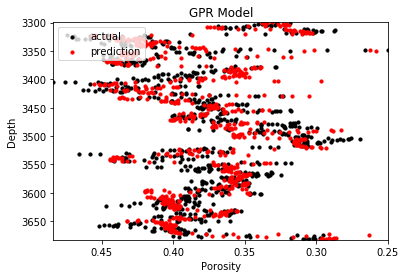

In [45]:
X3=df3_target[['ILD','VSH','Vp','P_imp']]
y3=df3_target[['NPHI']]


sc=StandardScaler().fit(X3)
X3_std=sc.transform(X3)
pcavalid=PCA(n_components=len(pca90.components_)) #jumlah komponen yang dipakai gw samain dengan komponen model
x3PCA = pcavalid.fit_transform(X3_std)

y3_pred, std3 = model.predict(x3PCA, return_std=True)

rmse3=mean_squared_error(y3,y3_pred)
test3_r2_score=r2_score(y3, y3_pred)
print("RMS error for well #3 is: " + str(rmse3))
print("r2 score of well 3 is: "+ str(test3_r2_score))

#plotting check overlay
y3['NPHI_pred']=y3_pred
y3=y3.sort_index()

plt.figure()
plt.scatter(y3['NPHI'],df3_target['DEPTH'],c='k',label='actual',s=10)
plt.scatter(y3['NPHI_pred'],df3_target['DEPTH'],c='r',label='prediction',s=10)
plt.legend(loc='upper left');
plt.ylim(df3_target['DEPTH'].max(),df3_target['DEPTH'].min())
plt.xlim(y3['NPHI'].max(),y3['NPHI'].min())
plt.xlabel('Porosity')
plt.ylabel('Depth')
plt.title('GPR Model')
plt.show()

Seperti yg gw bilang diatas, di sumur ini variance 90% dicover sama 3 komponen.

In [49]:
X3=df3_target[['ILD','VSH','Vp','P_imp']]
y3=df3_target[['NPHI']]


sc=StandardScaler().fit(X3)
X3_std=sc.transform(X3)
pcavalid=PCA(0.9)
x3PCA = pcavalid.fit_transform(X3_std)

print(pcavalid.components_)
print (pcavalid.explained_variance_ratio_)


[[ 0.48679317 -0.31151325  0.59138198  0.56236932]
 [-0.15676351 -0.93966172 -0.08961985 -0.29056725]
 [ 0.85852417  0.01118265 -0.31972842 -0.40073049]]
[0.66416518 0.20996383 0.11863896]


### Step 8 - confidence interval Sumur 3

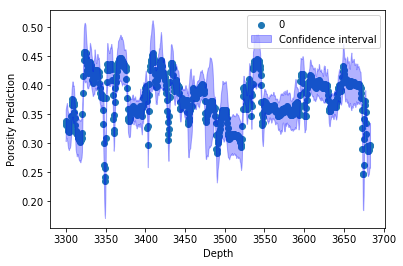

In [47]:
#confidence interval 95%

a=df3_target['DEPTH']
b=pd.DataFrame(y3_pred)
b=b[0]

ci = 1.96 * std3
#ci=np.array(ci)

fig, ax = plt.subplots()
ax.scatter(a,b)
ax.fill_between( a,(b-ci), (b+ci),  color='b', alpha=.3)
plt.xlabel('Depth')
plt.ylabel('Porosity Prediction')
ax.collections[1].set_label('Confidence interval')
ax.legend()
plt.show()

### BONUS SUMUR PUT-1

RMS error for well #3 is: 0.0008726237438787987
r2 score of well 3 is: 0.6063110538606971


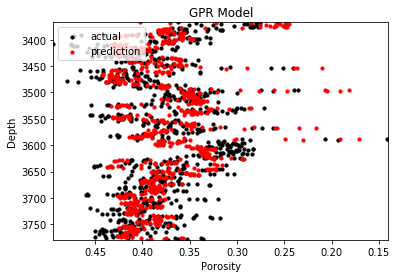

In [51]:
X4=df4_target[['ILD','VSH','Vp','P_imp']]
y4=df4_target[['NPHI']]


sc=StandardScaler().fit(X4)
X4_std=sc.transform(X4)
pcavalid=PCA(n_components=len(pca90.components_)) #jumlah komponen yang dipakai gw samain dengan komponen model
x4PCA = pcavalid.fit_transform(X4_std)

y4_pred, std4 = model.predict(x4PCA, return_std=True)

rmse4=mean_squared_error(y4,y4_pred)
test4_r2_score=r2_score(y4, y4_pred)
print("RMS error for well #3 is: " + str(rmse4))
print("r2 score of well 3 is: "+ str(test4_r2_score))

#plotting check overlay
y4['NPHI_pred']=y4_pred
y4=y4.sort_index()

plt.figure()
plt.scatter(y4['NPHI'],df4_target['DEPTH'],c='k',label='actual',s=10)
plt.scatter(y4['NPHI_pred'],df4_target['DEPTH'],c='r',label='prediction',s=10)
plt.legend(loc='upper left');
plt.ylim(df4_target['DEPTH'].max(),df4_target['DEPTH'].min())
plt.xlim(y4['NPHI'].max(),y4['NPHI'].min())
plt.xlabel('Porosity')
plt.ylabel('Depth')
plt.title('GPR Model')
plt.show()

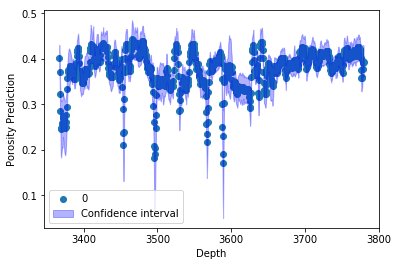

In [53]:
#confidence interval 95%

a=df4_target['DEPTH']
b=pd.DataFrame(y4_pred)
b=b[0]

ci = 1.96 * std4
#ci=np.array(ci)

fig, ax = plt.subplots()
ax.scatter(a,b)
ax.fill_between( a,(b-ci), (b+ci),  color='b', alpha=.3)
plt.xlabel('Depth')
plt.ylabel('Porosity Prediction')
ax.collections[1].set_label('Confidence interval')
ax.legend()
plt.show()